In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno
netflix_data = pd.read_csv('C:\\Users\\User\\Downloads\\transformers-main\\netflix_titles.csv')
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 8807 entries, 0 to 8806

Data columns (total 12 columns):

 #   Column        Non-Null Count  Dtype 

---  ------        --------------  ----- 

 0   show_id       8807 non-null   object

 1   type          8807 non-null   object

 2   title         8807 non-null   object

 3   director      6173 non-null   object

 4   cast          7982 non-null   object

 5   country       7976 non-null   object

 6   date_added    8797 non-null   object

 7   release_year  8807 non-null   int64 

 8   rating        8803 non-null   object

 9   duration      8804 non-null   object

 10  listed_in     8807 non-null   object

 11  description   8807 non-null   object

dtypes: int64(1), object(11)

memory usage: 825.8+ KB


<Axes: >

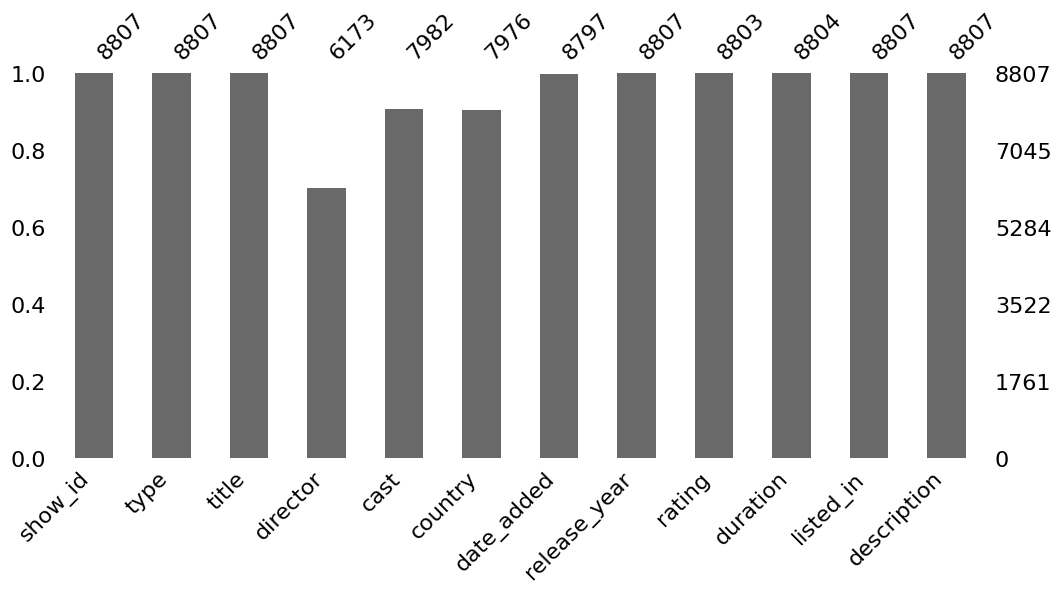

In [3]:
missingno.bar(netflix_data,figsize=(12,5))

In [4]:
netflix_data['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [5]:
netflix_data['cast']

0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(netflix_data['description'])

In [7]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix) 
results = {}
for idx, row in netflix_data.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
    similar_items = [(cosine_similarities[idx][i], netflix_data['show_id'][i]) for i in similar_indices] 
    results[row['show_id']] = similar_items[1:]

In [8]:
def item(id):  
    return netflix_data.loc[netflix_data['show_id'] == id]['title'].tolist()[0].split(' - ')[0] 

# Just reads the results out of the dictionary.def 
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")   
    print("-------")    
    recs = results[item_id][:num] 
    for rec in recs: 
        print("Recommended: " + item(rec[1]) + " (score:" +      str(rec[0]) + ")")

In [9]:
recommend('s1305',6)

Recommending 6 products similar to Animals on the Loose: A You vs. Wild Movie...

-------

Recommended: You vs. Wild (score:0.09073680011826205)

Recommended: Man vs Wild with Sunny Leone (score:0.08601513298456354)

Recommended: 40 Sticks (score:0.058130066195245626)

Recommended: Headspace: Unwind Your Mind (score:0.057449858308477035)

Recommended: Captain Underpants Epic Choice-o-Rama (score:0.05686586934355087)

Recommended: The Boss Baby: Get That Baby! (score:0.0558821452828295)


In [10]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

  from .autonotebook import tqdm as notebook_tqdm















In [11]:
import torch
# Save the entire model
torch.save(model, 'model_sentence_tranformer.pth')

In [13]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [21]:
import pandas as pd

# Assuming you have a DataFrame called 'netflix_data' with columns 'type', 'director', 'cast', 'country', 'date_added', 'release_year', 'listed_in', 'description'

# Create a new column called 'details' by combining the specified columns
netflix_data['details'] = netflix_data[['type', 'director', 'cast', 'country', 'date_added', 'release_year', 'listed_in', 'description']].apply(lambda x: ' '.join([f"{col}: {val}," for col, val in x.dropna().items()]), axis=1)

# View the updated DataFrame
print(netflix_data.head())


  show_id     type                  title         director  \

0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   

1      s2  TV Show          Blood & Water              NaN   

2      s3  TV Show              Ganglands  Julien Leclercq   

3      s4  TV Show  Jailbirds New Orleans              NaN   

4      s5  TV Show           Kota Factory              NaN   



                                                cast        country  \

0                                                NaN  United States   

1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

3                                                NaN            NaN   

4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   



           date_added  release_year rating   duration  \

0  September 25, 2021          2020  PG-13     90 min   

1  September 24, 2021          2021  TV-MA  2 Seasons   

2  September

In [22]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,details
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","type: Movie, director: Kirsten Johnson, countr..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","type: TV Show, cast: Ama Qamata, Khosi Ngema, ..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"type: TV Show, director: Julien Leclercq, cast..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","type: TV Show, date_added: September 24, 2021,..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"type: TV Show, cast: Mayur More, Jitendra Kuma..."


In [35]:

# Convert the 'details' column to lowercase
netflix_data['details'] = netflix_data['details'].str.lower()
descriptions = netflix_data['details'].tolist()

In [36]:
descriptions[0]

'type: movie, director: kirsten johnson, country: united states, date_added: september 25, 2021, release_year: 2020, listed_in: documentaries, description: as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable.,'

In [25]:

# print(descriptions)
des_embeddings = []
for i,des in enumerate(descriptions):
    des_embeddings.append(model.encode(des))

In [30]:
des_embeddings[0].shape

(768,)

In [31]:
# Convert the embeddings list to a NumPy array
des_embeddings = np.array(des_embeddings)
# Save the des_embeddings as a NumPy array
np.save('descriptions_embeddings.npy', des_embeddings)

In [34]:
import torch
from sentence_transformers import SentenceTransformer, util

def recommend(query):
    #Compute cosine-similarities with all embeddings 
    query_embedd = model.encode(query)
    cosine_scores = util.pytorch_cos_sim(query_embedd, des_embeddings)
    top5_matches = torch.argsort(cosine_scores, dim=-1, descending=True).tolist()[0][1:6]
    return top5_matches

id = 's1305'
query_show_des = netflix_data.loc[netflix_data['show_id'] == id]['description'].to_list()[0]
recommendded_results = recommend("type tv shows latte and the magic waterstone and director regina welkar and cast ashley")

for index in recommendded_results:
    print(netflix_data.iloc[index,:])



show_id                                                      s342

type                                                        Movie

title                                                    Magnolia

director                                     Paul Thomas Anderson

cast            John C. Reilly, Philip Baker Hall, Tom Cruise,...

country                                             United States

date_added                                         August 1, 2021

release_year                                                 1999

rating                                                          R

duration                                                  189 min

listed_in                              Dramas, Independent Movies

description     Through chance, history and divine interventio...

details         type: Movie, director: Paul Thomas Anderson, c...

Name: 341, dtype: object

show_id                                                     s4725

type                                

In [45]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
df = pd.read_csv('filter_data.csv', index_col=0)

In [51]:
def combine_features(row):
    return row['original_title']+' '+row['genres']+' '+ row['original_language']
    +' '+row['director']+' '+row['keywords']+' '+row['cast']+' '+row['tagline']
    +' '+row['production_countries']

In [52]:
df['combined_value'] = df.apply(combine_features, axis = 1)

In [53]:
df['index'] = [i for i in range(0, len(df))]

In [54]:
# Functions

#Get title of movie
def title(index):
    return df[df.index == index]["original_title"].values[0]

#Get index of movie
def index(original_title):
    return df[df.original_title == original_title]["index"].values[0]

In [55]:
from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('bert-base-nli-mean-tokens')

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

  from .autonotebook import tqdm as notebook_tqdm















In [56]:
import torch
# Save the entire model
torch.save(bert, 'model_sentence_tranformer_movies_dataset.pth')

In [5]:
import torch
bert = torch.load('model_sentence_tranformer_movies_dataset.pth')

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

  from .autonotebook import tqdm as notebook_tqdm


In [57]:
#Get Embeddings
#sentence_embeddings = bert.encode(df['combined_value'].tolist())

In [58]:
#sentence_embeddings = np.array(sentence_embeddings)
#np.save("embeddings_movies_Dataset.npy", sentence_embeddings)

In [3]:
sentence_embeddings = np.load("embeddings_movies_Dataset.npy")

In [59]:
#Compute similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(sentence_embeddings)

In [113]:
movie_desc = 'Drama movies containing drama '
embed = bert.encode(movie_desc)

In [114]:
from sentence_transformers import SentenceTransformer, util

In [115]:
cosine_scores = util.pytorch_cos_sim(embed, sentence_embeddings)

In [116]:
cosine_scores

tensor([[0.3752, 0.5029, 0.3799,  ..., 0.5755, 0.5129, 0.5951]])

In [117]:
top5_matches = torch.argsort(cosine_scores, dim=-1, descending=True).tolist()[0][1:6]

In [118]:
top5_matches

[28577, 14088, 28684, 19228, 5370]

In [119]:
df.iloc[top5_matches]

,id,genres,original_language,production_countries,tagline,original_title,keywords,cast,director,adult,release_date,status
43290,160165,Drama Thriller,pl,Poland,NaN,W Imię...,gay homophobia priest homosexuality gay intere...,Andrzej Chyra Mateusz Kościukiewicz Maja Ostas...,Małgorzata Szumowska,False,2013-09-06,Released
17470,64566,Drama,en,NaN,NaN,Cinema Verite,woman director,Tim Robbins Diane Lane James Gandolfini Thomas...,Shari Springer Berman Robert Pulcini,False,2011-04-23,Released
43487,380623,Drama Thriller,fr,BelgiumFranceGermany,NaN,Nocturama,terrorismo,Finnegan Oldfield Vincent Rottiers Hamza Mezia...,Bertrand Bonello,False,2016-08-31,Released
25652,295144,Drama TV Movie,en,United Kingdom,"I always wanted to be happy, so I decided to be.",Marvellous,drama soccer tv movie intellectual disability,Toby Jones Gemma Jones Tony Curran Nicholas Gl...,Julian Farino,False,2015-02-19,Released
6261,11458,Drama Thriller,en,GermanyUnited States of America,NaN,People I Know,drug addiction press release from prison women...,Al Pacino Kim Basinger Ryan O'Neal Téa Leoni J...,Daniel Algrant,False,2002-11-21,Released


In [65]:
movie_recommendation = sorted(list(enumerate(similarity[index(movie_name)])), key = lambda x:x[1], reverse = True)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [63]:
print(title(movie_recommendation[1][0]), title(movie_recommendation[2][0]), title(movie_recommendation[3][0]), sep = "\n")

Toy Story 2

Toy Story 3

The Aristocats
